# Load raster data via WMS

In [1]:
import matplotlib.pyplot as plt
from datetime import datetime
import warnings

import geoengine as ge

## Initialize Geo Engine

In [2]:
client = ge.create_client("http://localhost:3030/api")

In [3]:
client.get_session()

Server:              http://localhost:3030/api
User Id:             d29ebf27-dc80-48b0-af19-cb82a0313d65
Session Id:          0597f159-7ffc-4616-89aa-1d1f184d9c04
Session valid until: 2023-12-01T16:04:00.859Z

## Define workflow of MODIS NDVI raster

In [4]:
workflow = client.workflow_register({
                "type": "Raster",
                "operator": {
                    "type": "GdalSource",
                    "params": {
                        "data": "ndvi"
                    }
                }
            })
workflow

0abf52bc-e7da-557b-be43-59b96b591f4a

## Define a query rectangle

In [5]:
time_start = datetime.strptime('2014-04-01T12:00:00.000Z', "%Y-%m-%dT%H:%M:%S.%f%z")
time_end = datetime.strptime('2014-06-01T12:00:00.000Z', "%Y-%m-%dT%H:%M:%S.%f%z")
bbox = ge.QueryRectangle(
    ge.BoundingBox2D(-180.0, -90.0, 180.0, 90.0),
    ge.TimeInterval(time_start, time_end),
    ge.SpatialResolution(0.5, 0.5),
)

## Query the raster workflow as single tiles

Connecting to ws://localhost:3030/api/workflow/0abf52bc-e7da-557b-be43-59b96b591f4a/rasterStream?resultType=arrow&spatialBounds=-180.0%2C-90.0%2C180.0%2C90.0&timeInterval=2014-04-01T12%3A00%3A00.000%2B00%3A00%2F2014-06-01T12%3A00%3A00.000%2B00%3A00&spatialResolution=0.5%2C0.5


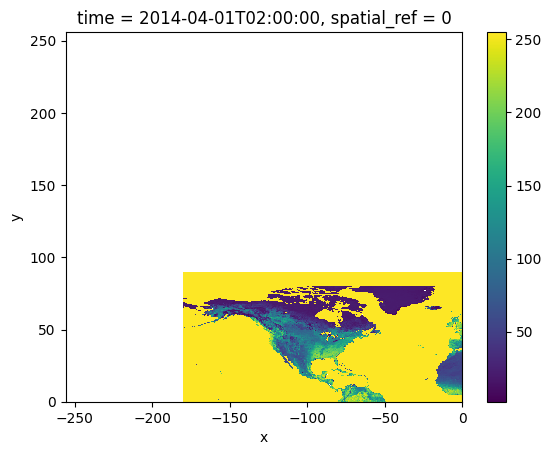

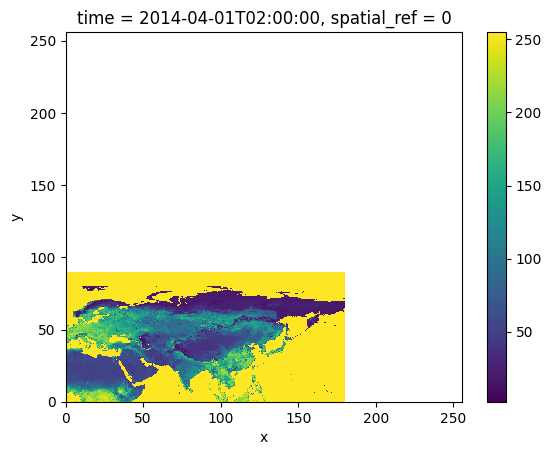

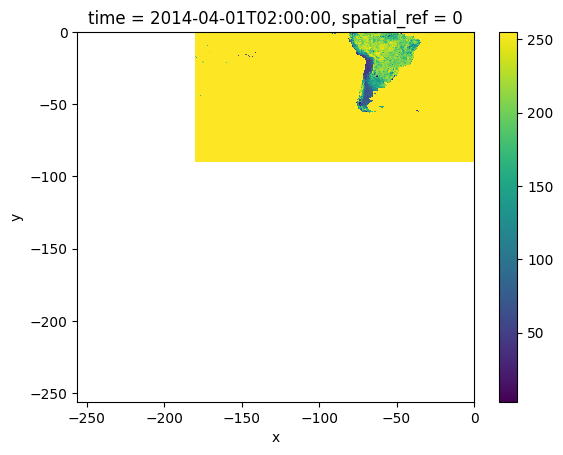

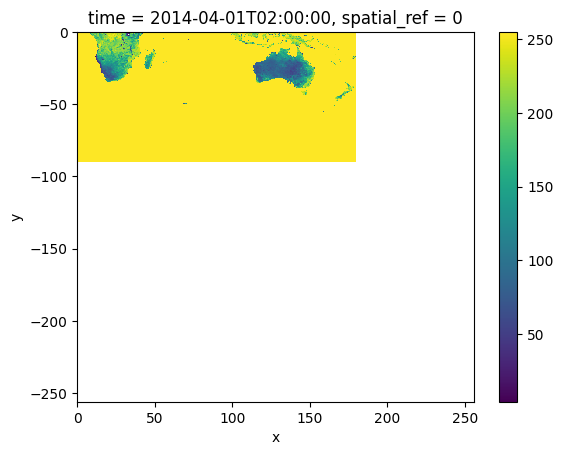

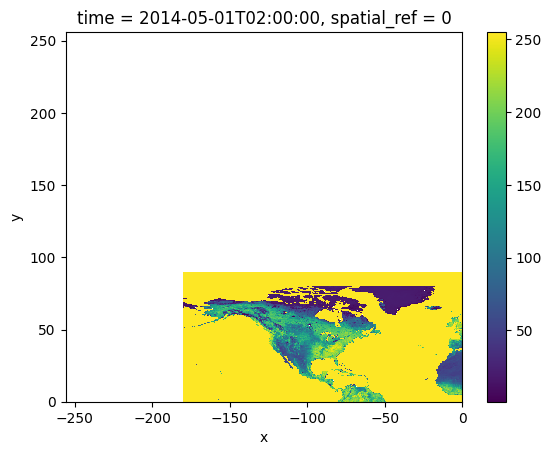

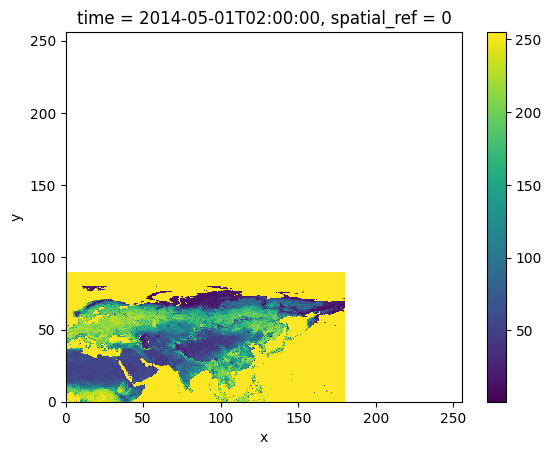

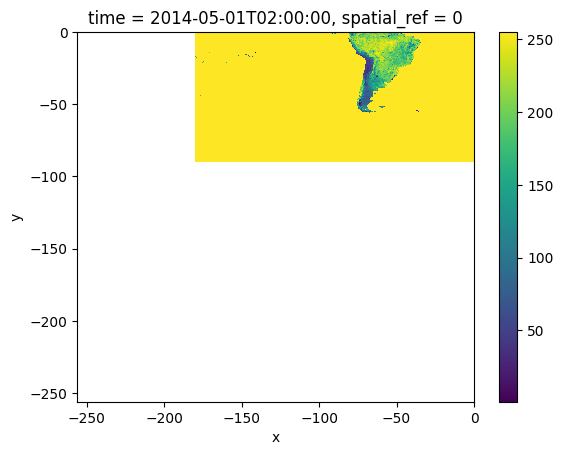

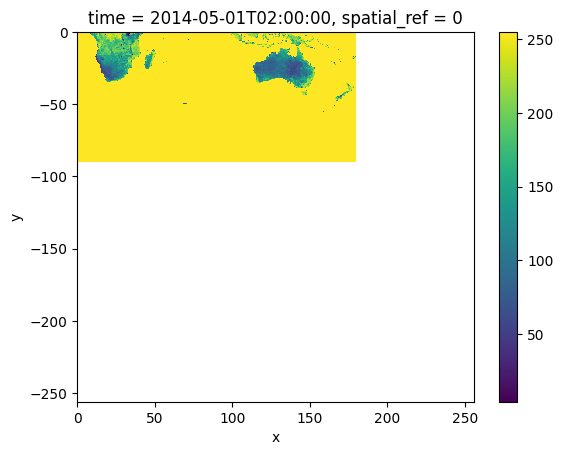

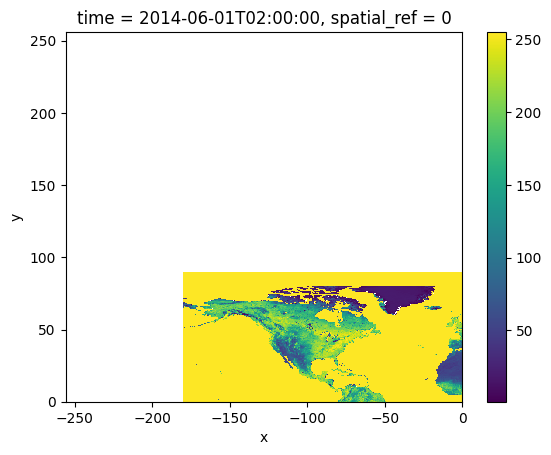

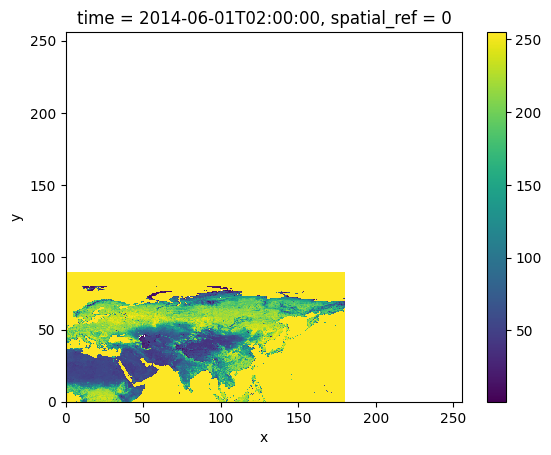

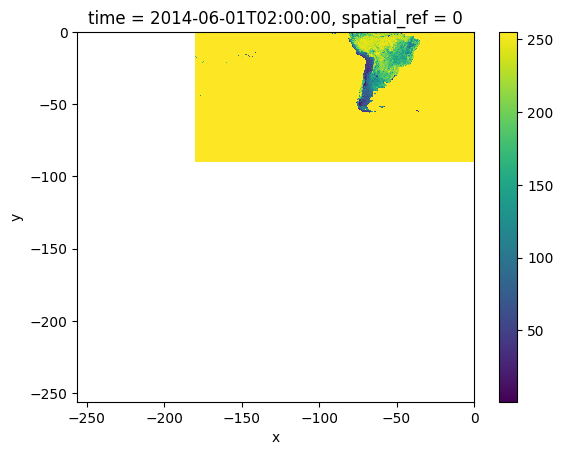

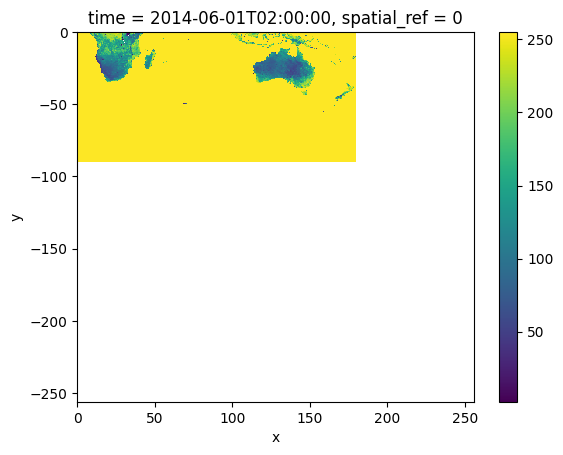

In [6]:
async for tile in client.workflow_as_raster_stream(workflow, bbox):
    tile.to_xarray().plot()
    plt.show()

Connecting to ws://localhost:3030/api/workflow/0abf52bc-e7da-557b-be43-59b96b591f4a/rasterStream?resultType=arrow&spatialBounds=-180.0%2C-90.0%2C180.0%2C90.0&timeInterval=2014-04-01T12%3A00%3A00.000%2B00%3A00%2F2014-06-01T12%3A00%3A00.000%2B00%3A00&spatialResolution=0.5%2C0.5


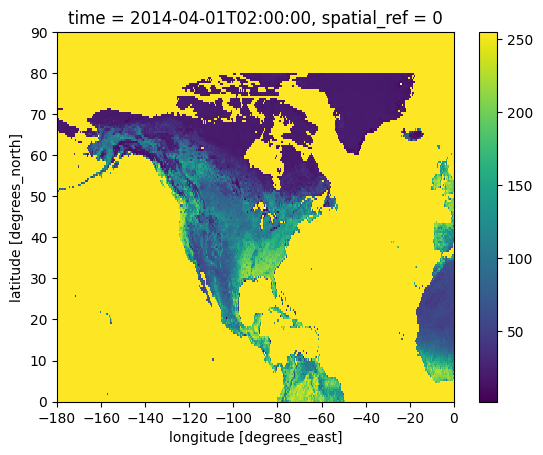

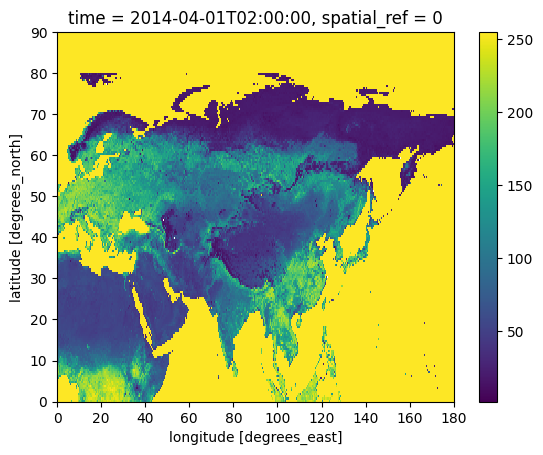

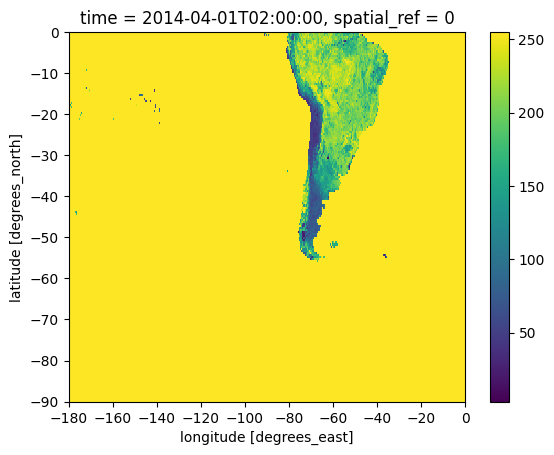

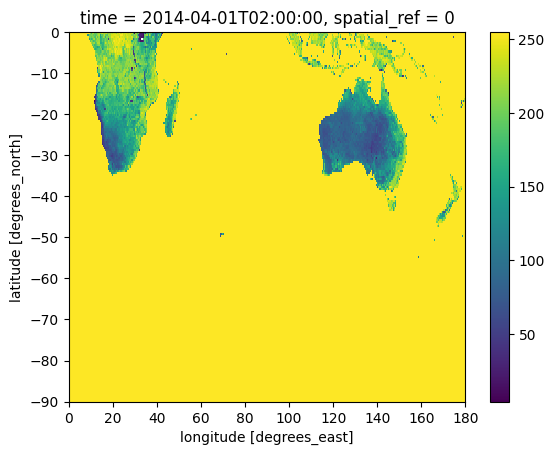

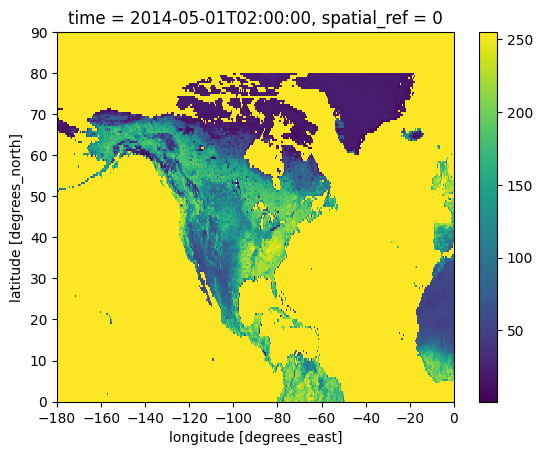

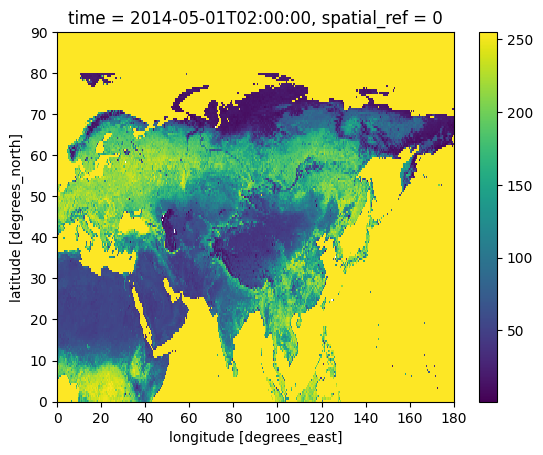

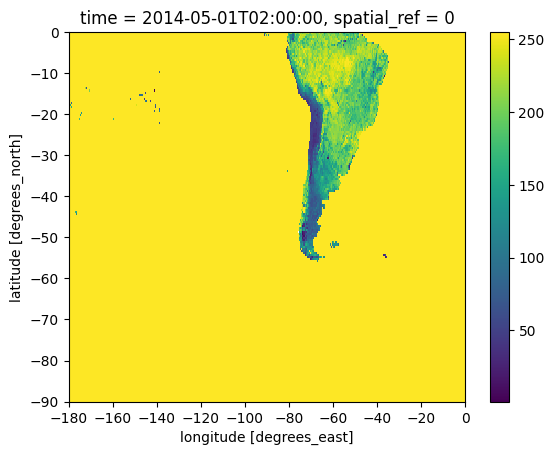

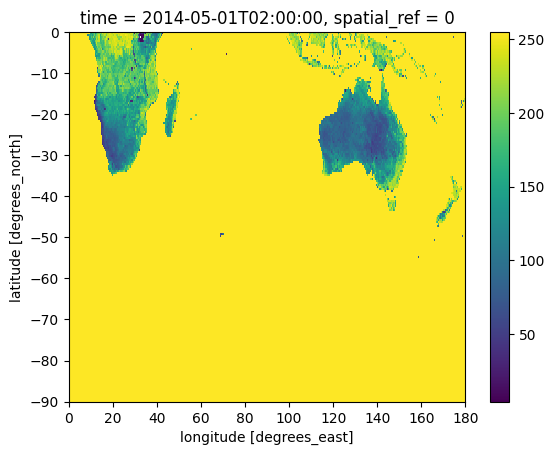

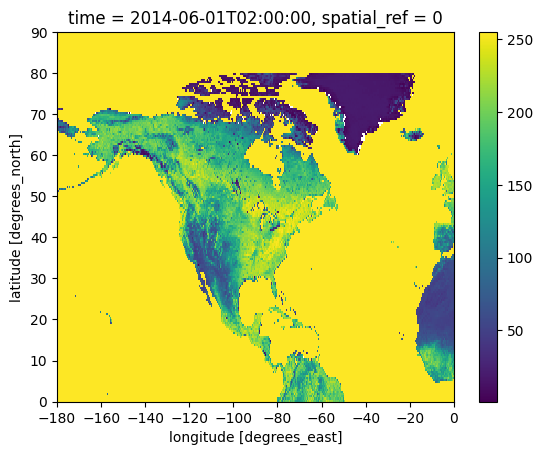

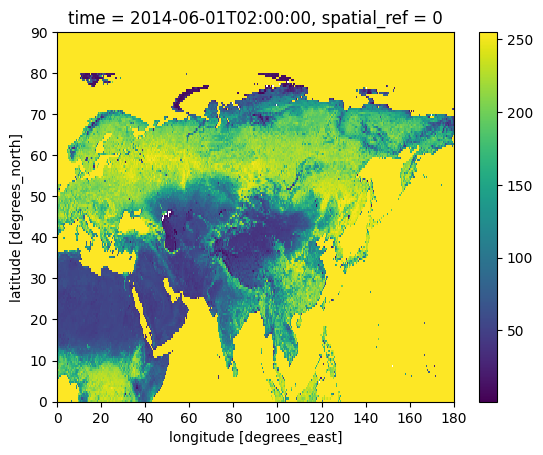

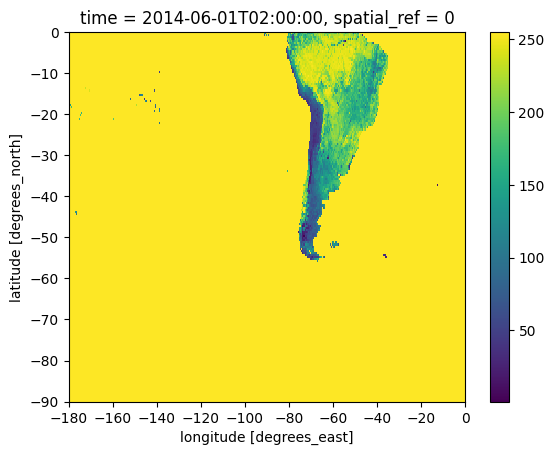

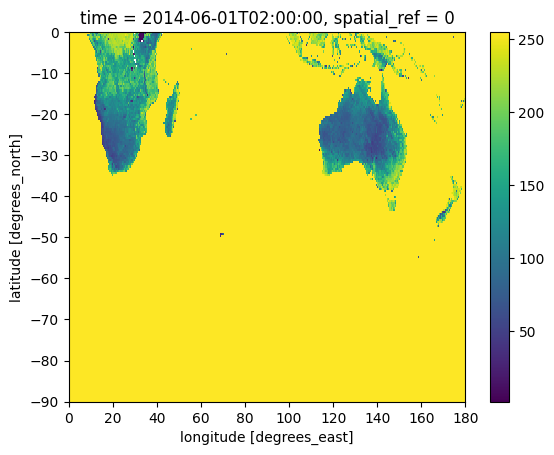

In [7]:
# setting `clip_to_query_rectangle=True` may output a warning, but this is a false positive from the underlying library
warnings.simplefilter(action='ignore', category=FutureWarning)



async for tile in client.workflow_as_raster_stream(workflow, bbox):
    tile.to_xarray(clip_with_bounds=bbox.spatial_bounds).plot()
    plt.show()

# Query single tiles, merge them locally and output them as a single `DataArray`

default (no clip)
Connecting to ws://localhost:3030/api/workflow/0abf52bc-e7da-557b-be43-59b96b591f4a/rasterStream?resultType=arrow&spatialBounds=-180.0%2C-90.0%2C180.0%2C90.0&timeInterval=2014-04-01T12%3A00%3A00.000%2B00%3A00%2F2014-06-01T12%3A00%3A00.000%2B00%3A00&spatialResolution=0.5%2C0.5


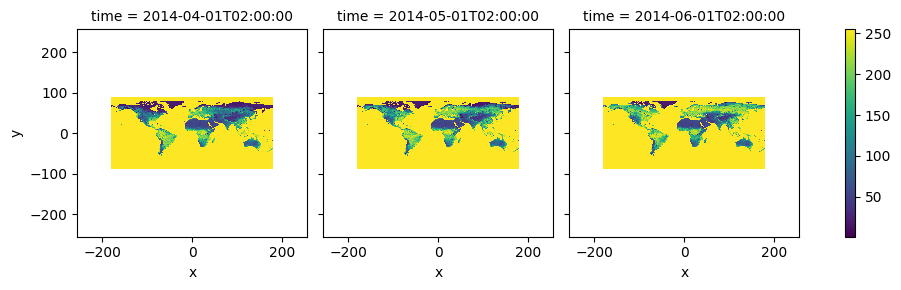

clip to query rectangle
Connecting to ws://localhost:3030/api/workflow/0abf52bc-e7da-557b-be43-59b96b591f4a/rasterStream?resultType=arrow&spatialBounds=-180.0%2C-90.0%2C180.0%2C90.0&timeInterval=2014-04-01T12%3A00%3A00.000%2B00%3A00%2F2014-06-01T12%3A00%3A00.000%2B00%3A00&spatialResolution=0.5%2C0.5


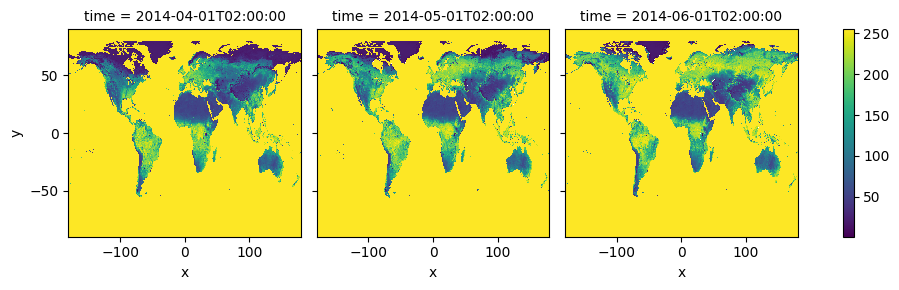

<xarray.DataArray (time: 3, y: 360, x: 720)>
array([[[255., 255., 255., ..., 255., 255., 255.],
        [255., 255., 255., ..., 255., 255., 255.],
        [255., 255., 255., ..., 255., 255., 255.],
        ...,
        [255., 255., 255., ..., 255., 255., 255.],
        [255., 255., 255., ..., 255., 255., 255.],
        [255., 255., 255., ..., 255., 255., 255.]],

       [[255., 255., 255., ..., 255., 255., 255.],
        [255., 255., 255., ..., 255., 255., 255.],
        [255., 255., 255., ..., 255., 255., 255.],
        ...,
        [255., 255., 255., ..., 255., 255., 255.],
        [255., 255., 255., ..., 255., 255., 255.],
        [255., 255., 255., ..., 255., 255., 255.]],

       [[255., 255., 255., ..., 255., 255., 255.],
        [255., 255., 255., ..., 255., 255., 255.],
        [255., 255., 255., ..., 255., 255., 255.],
        ...,
        [255., 255., 255., ..., 255., 255., 255.],
        [255., 255., 255., ..., 255., 255., 255.],
        [255., 255., 255., ..., 255., 255., 255.]]])
Coordinates:
  * x            (x) float64 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
  * y            (y) float64 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * time         (time) datetime64[ns] 2014-04-01T02:00:00 ... 2014-06-01T02:...
    spatial_ref  int64 0

In [9]:
# setting `clip_to_query_rectangle=True` may output a warning, but this is a false positive from the underlying library
warnings.simplefilter(action='ignore', category=FutureWarning)

print('default (no clip)')

array = await client.workflow_as_raster_stream_into_xarray(workflow, bbox)

array.plot(col="time");
plt.show()

print('clip to query rectangle')

array = await client.workflow_as_raster_stream_into_xarray(workflow, bbox, clip_to_query_rectangle=True)

array.plot(col="time");
plt.show()

array